1) Ülkemiz Türkiye'yi baz alacak olursak; 2015-2019 yılları arasında insanların mutlu olmasına etki eden faktörler yıllara göre neler ve zamanla nasıl değişmiş?

2) Sadece 2019 verisini baz alırsak; 2019 yılındaki en mutlu ülke hangisidir? Hangi faktör/faktörler en mutlu ülke olmasını sağlamış olabilir? Görselleştirerek ifade etmenizi bekliyoruz.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv


In [2]:
df_2015=pd.read_csv("/kaggle/input/world-happiness/2015.csv")
df_2016=pd.read_csv("/kaggle/input/world-happiness/2016.csv")
df_2017=pd.read_csv("/kaggle/input/world-happiness/2017.csv")
df_2018=pd.read_csv("/kaggle/input/world-happiness/2018.csv")
df_2019=pd.read_csv("/kaggle/input/world-happiness/2019.csv")

df_2015["Year"]=2015
df_2016["Year"]=2016
df_2017["Year"]=2017
df_2018["Year"]=2018
df_2019["Year"]=2019

1.Soru : Ülkemiz Türkiye'yi baz alacak olursak; 2015-2019 yılları arasında insanların mutlu olmasına etki eden faktörler yıllara göre neler ve zamanla nasıl değişmiş?

In [3]:
df_1=pd.concat([df_2015,df_2016,df_2017])
df_2=pd.concat([df_2018,df_2019])

In [4]:
scores=df_1["Happiness Score"].dropna()
happinessScores=df_1["Happiness.Score"].dropna()
appended=scores.append(happinessScores)
df_1["Happiness Score"]=appended

In [5]:
gdpPerCapitas=df_1["Economy (GDP per Capita)"].dropna()
economyGdpPerCapitas=df_1["Economy..GDP.per.Capita."].dropna()
appended=gdpPerCapitas.append(economyGdpPerCapitas)
df_1["Economy (GDP per Capita)"]=appended

In [6]:
health1=df_1["Health (Life Expectancy)"].dropna()
health2=df_1["Health..Life.Expectancy."].dropna()
appended=health1.append(health2)
df_1["Health (Life Expectancy)"]=appended

In [7]:
dystopiaResidual1=df_1["Dystopia Residual"].dropna()
dystopiaResidual2=df_1["Dystopia.Residual"].dropna()
appended=dystopiaResidual1.append(dystopiaResidual2)
df_1["Dystopia Residual"]=appended

In [8]:
trustGovernmentCorruption1=df_1["Trust (Government Corruption)"].dropna()
trustGovernmentCorruption2=df_1["Trust..Government.Corruption."].dropna()
appended=trustGovernmentCorruption1.append(trustGovernmentCorruption2)
df_1["Trust (Government Corruption)"]=appended

In [9]:
happinessRank1=df_1["Happiness Rank"].dropna()
happinessRank2=df_1["Happiness.Rank"].dropna()
appended=happinessRank1.append(happinessRank2)
df_1["Happiness Rank"]=appended

In [10]:
df_1.drop(columns=["Happiness.Score","Happiness.Rank","Economy..GDP.per.Capita.","Health..Life.Expectancy.","Dystopia.Residual","Trust..Government.Corruption.","Standard Error"],inplace=True)

In [11]:
df_1.rename(columns={"Economy (GDP per Capita)":"GDP per capita","Happiness Rank":"Overall Rank","Happiness Score":"Score"},inplace=True)
df_2.rename(columns={"Freedom to make life choices":"Freedom","Country or region":"Country","Perceptions of corruption":"Trust (Government Corruption)"},inplace=True)

In [12]:
#!pip install ycimpute
!pip install ycimpute==0.1.1

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
merged_df=pd.merge(df_1,df_2,on=["Country","Score","GDP per capita","Freedom","Trust (Government Corruption)","Generosity","Year"],how="outer")
merged_df["IsTurkey"]=merged_df["Country"]=="Turkey"
merged_df["IsTurkey"]=merged_df["IsTurkey"].astype("int64")

In [19]:
from ycimpute.imputer import knnimput
merged_df_cont=merged_df.select_dtypes(["int64","float64"])
np_arr_merged_df=np.array(merged_df_cont)
knned_merged_df=knnimput.KNN(k=4).complete(np_arr_merged_df)
knned_df=pd.DataFrame(knned_merged_df,columns=merged_df_cont.columns)

,Overall Rank,Score,GDP per capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Overall rank,Social support,Healthy life expectancy,IsTurkey
0,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,NaN,3.334,0.35900,NaN,NaN,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN,NaN,NaN,152.0,0.711,0.614,0
778,NaN,3.231,0.47600,NaN,NaN,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN,NaN,NaN,153.0,0.885,0.499,0
779,NaN,3.203,0.35000,NaN,NaN,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN,NaN,NaN,154.0,0.517,0.361,0
780,NaN,3.083,0.02600,NaN,NaN,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN,NaN,NaN,155.0,0.000,0.105,0


In [20]:
df_turkey=knned_df[(knned_df["IsTurkey"] ==1.0)]
df_turkey.drop(columns=["IsTurkey","Overall rank","Overall Rank"],inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
grouped_df=df_turkey.groupby("Score").sum()

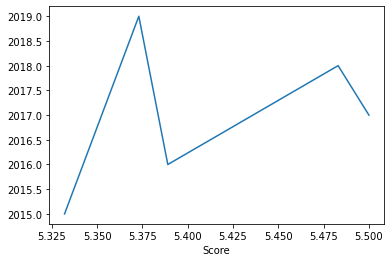

In [23]:
grouped_df.Year.plot()

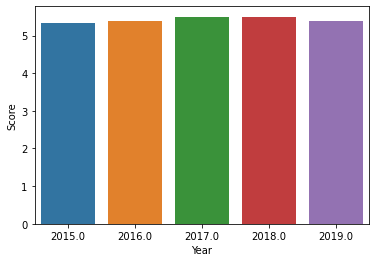

In [24]:
sns.barplot(x="Year",y=grouped_df.index,data=grouped_df)

In [25]:
grouped_df_resetted=grouped_df.reset_index()

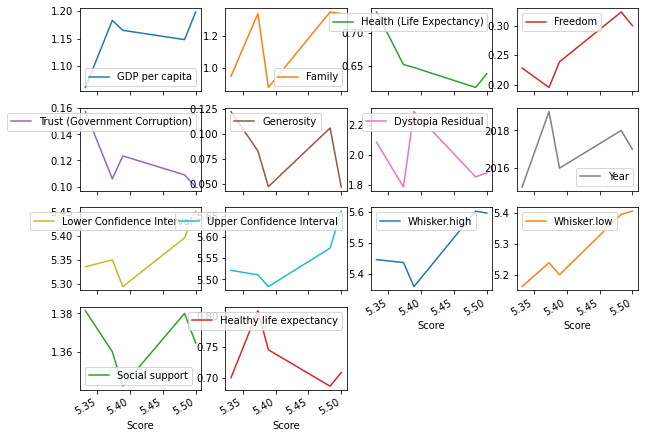

In [26]:
import matplotlib.pyplot as plt

grouped_df_resetted.plot(x="Score", subplots=True,layout=(10,4),figsize=(10,20),legend=True)
plt.legend()

plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaled_grouped_np=StandardScaler().fit_transform(grouped_df.values)
scaled_grouped_df=pd.DataFrame(scaled_grouped_np,columns=grouped_df.columns,index=grouped_df.Year)
scaled_grouped_df.sort_index()
scaled_grouped_df=scaled_grouped_df.abs()

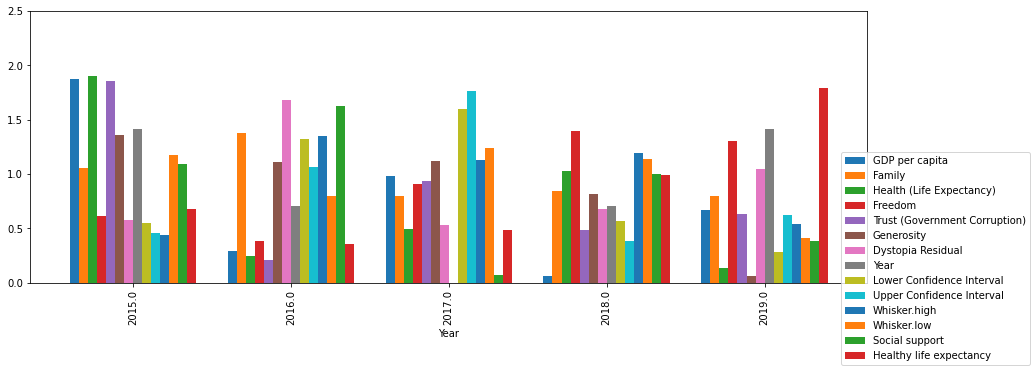

In [28]:
scaled_grouped_df=scaled_grouped_df.sort_index()
scaled_grouped_df.plot.bar(width=0.8,figsize=(15,5),ylim=(0,2.5),align='center').legend(bbox_to_anchor=(1.2, 0.5))

2.Soru :  Sadece 2019 verisini baz alırsak; 2019 yılındaki en mutlu ülke hangisidir? Hangi faktör/faktörler en mutlu ülke olmasını sağlamış olabilir? Görselleştirerek ifade etmenizi bekliyoruz.

In [29]:
happiest_2019=df_2019[df_2019["Score"]==df_2019["Score"].max()]
#Overall rank ile de alabilirdik

In [30]:
X=happiest_2019[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]]
melted_df_X=pd.melt(X)

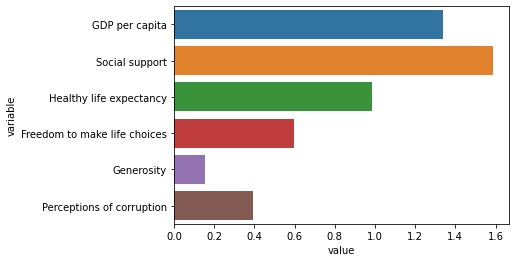

In [31]:
sns.barplot(y=melted_df_X.variable,x=melted_df_X.value)